<a href="https://colab.research.google.com/github/AshwinAshok3/Personal-Loan/blob/main/Capstone_Project___Thera_Bank_Personal_Loan_Campain___Jupyter_Notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campaign for selling personal loans.

##### This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

##### The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

##### The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## DataSet Description:
#### ID - Customer ID
#### Age - Customer's age in completed years
#### Experience - Number years of professional experience
#### Income - Annual income of the customer (US Dollars)
#### ZIPCode - Home Address ZIP code.
#### Family - Family size of the customer
#### CCAvg - Avg. spending on credit cards per month (US Dollars)
#### Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
#### Mortgage - Value of house mortgage if any. (US Dollars)
#### Personal Loan - Did this customer accept the personal loan offered in the last campaign?
#### Securities Account - Does the customer have a securities account with the bank?
#### CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
#### Online - Does the customer use internet banking facilities?
#### CreditCard - Does the customer use a credit card issued by UniversalBank?

## Task 1: Data Loading  (5 Marks)
Perform the following tasks

1. Import the necessary libraries required
2. Read the csv into a dataframe
3. Display the first five rows of your dataframe.
4. Display the datatypes of the columns
5. Display the column names in the dataframe

In [42]:
!pip install tensorflow
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [43]:
# Import the necessary libraries required

# data cleaning tools
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# deep learning tools
import tensorflow as tf
import keras_tuner

In [45]:
# Read the csv into a dataframe

# importing the data [Bank_Personal_Loan_Modelling-1.csv]
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
pd.set_option('display.max_columns', None)

In [46]:
# Display the first five rows of your dataframe.
bank_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [47]:
# Display the datatypes of the columns
bank_df.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIP Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64


In [49]:
# Display the column names in the dataframe
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Task 2: Data Cleaning (10 Marks)

1. Drop the unnecessary columns in the dataframe(i.e. 'ID'). <b>(2Marks)</b>
2. Check for missing values in the dataframe and display the count in ascending order. Impute the missing values. <b>(2Marks)</b>
3. Check whether there are any duplicate values in the dataframe and if present remove them. <b>(2Marks)</b>
4. Display the total number of records in the dataframe after removing the duplicates. <b>(2Marks)</b>
5. Create a 5 Point summary of the data. <b>(2Marks)</b>

In [50]:
# Drop the unnecessary columns in the dataframe(i.e. 'ID')
bank_df.drop('ID', axis=1, inplace=True)

In [51]:
bank_df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [52]:
# Check for missing values in the dataframe and display the count in ascending order. Impute the missing values
bank_df.isnull().sum().sort_values(ascending=True)

,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0


In [53]:
bank_df.isna().sum()

,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0


In [54]:
# Check whether there are any duplicate values in the dataframe and if present remove them
bank_df.duplicated().sum()

np.int64(0)

In [55]:
# Display the total number of records in the dataframe after removing the duplicates.
bank_df.drop_duplicates(inplace=True)
bank_df.shape

(5000, 13)

In [56]:
# Create a 5 Point summary of the data
bank_df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Task 3: Data Analysis and Visualization (20Marks)

1. Check for correlation of the attributes in the dataframe and plot the heatmap for the same. <b>(4Marks)</b>
2. Plot a pairplot for the attributes. Use "Personal Loan" as hue. <b>(4Marks)</b>
3. From the above visualization identify the attributes that are correlated and drop the unnecessary attribute(column) <b>(4Marks)</b>
4. Plot a boxplot to understand the distribution of data for the attributes such as "Age", "Income", Family", "CCAvg", "Education", "Mortgage" by taking x axis as "Personal Loan" <b>(4Marks)</b>
5. Display the unique values of attributes "Family", "Education" and "Personal loan" and plot a bargraph. <b>(4Marks)</b>

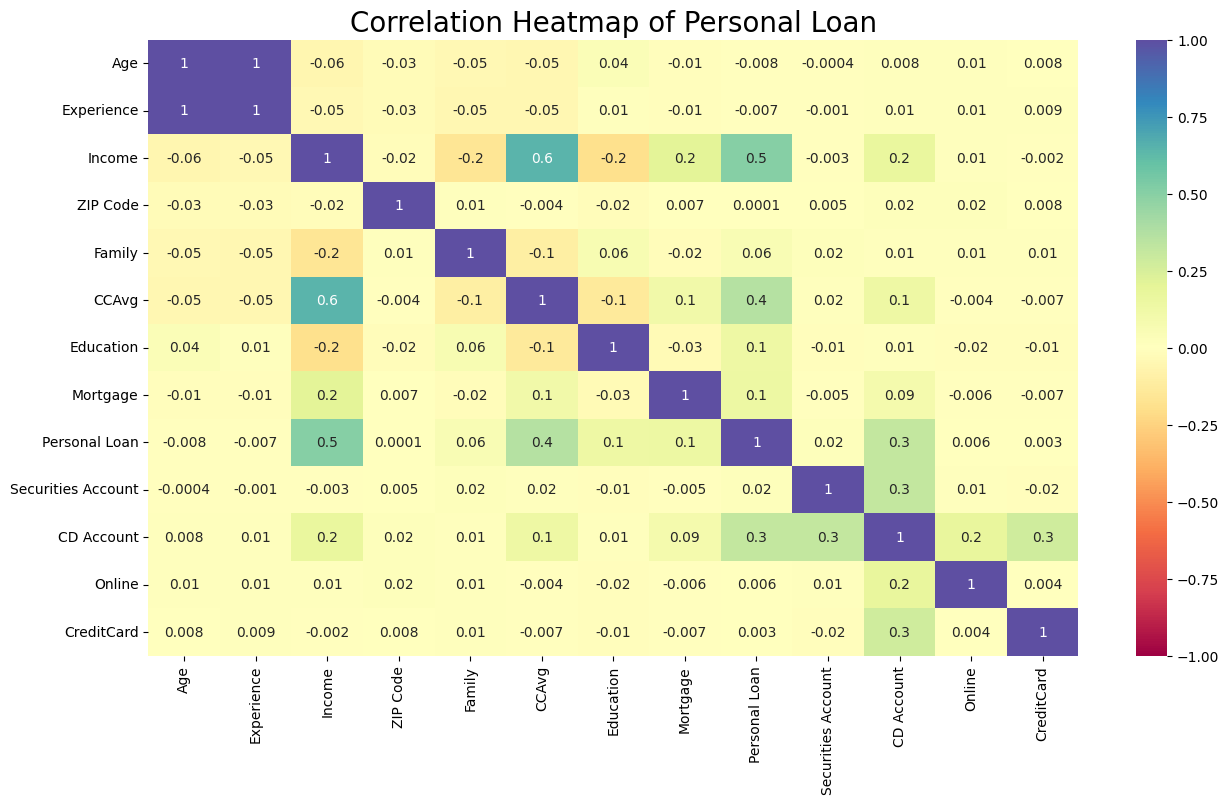

In [74]:
# Check for correlation of the attributes in the dataframe and plot the heatmap for the same.

bank_df.corr()
# heatmap
plt.figure(figsize=(15,8))
sns.heatmap(bank_df.corr(), annot=True, vmax=1, vmin=-1, fmt=".1g", cmap="Spectral")
plt.title("Correlation Heatmap of Personal Loan", fontsize=20)
plt.show()

<Figure size 3000x2000 with 0 Axes>

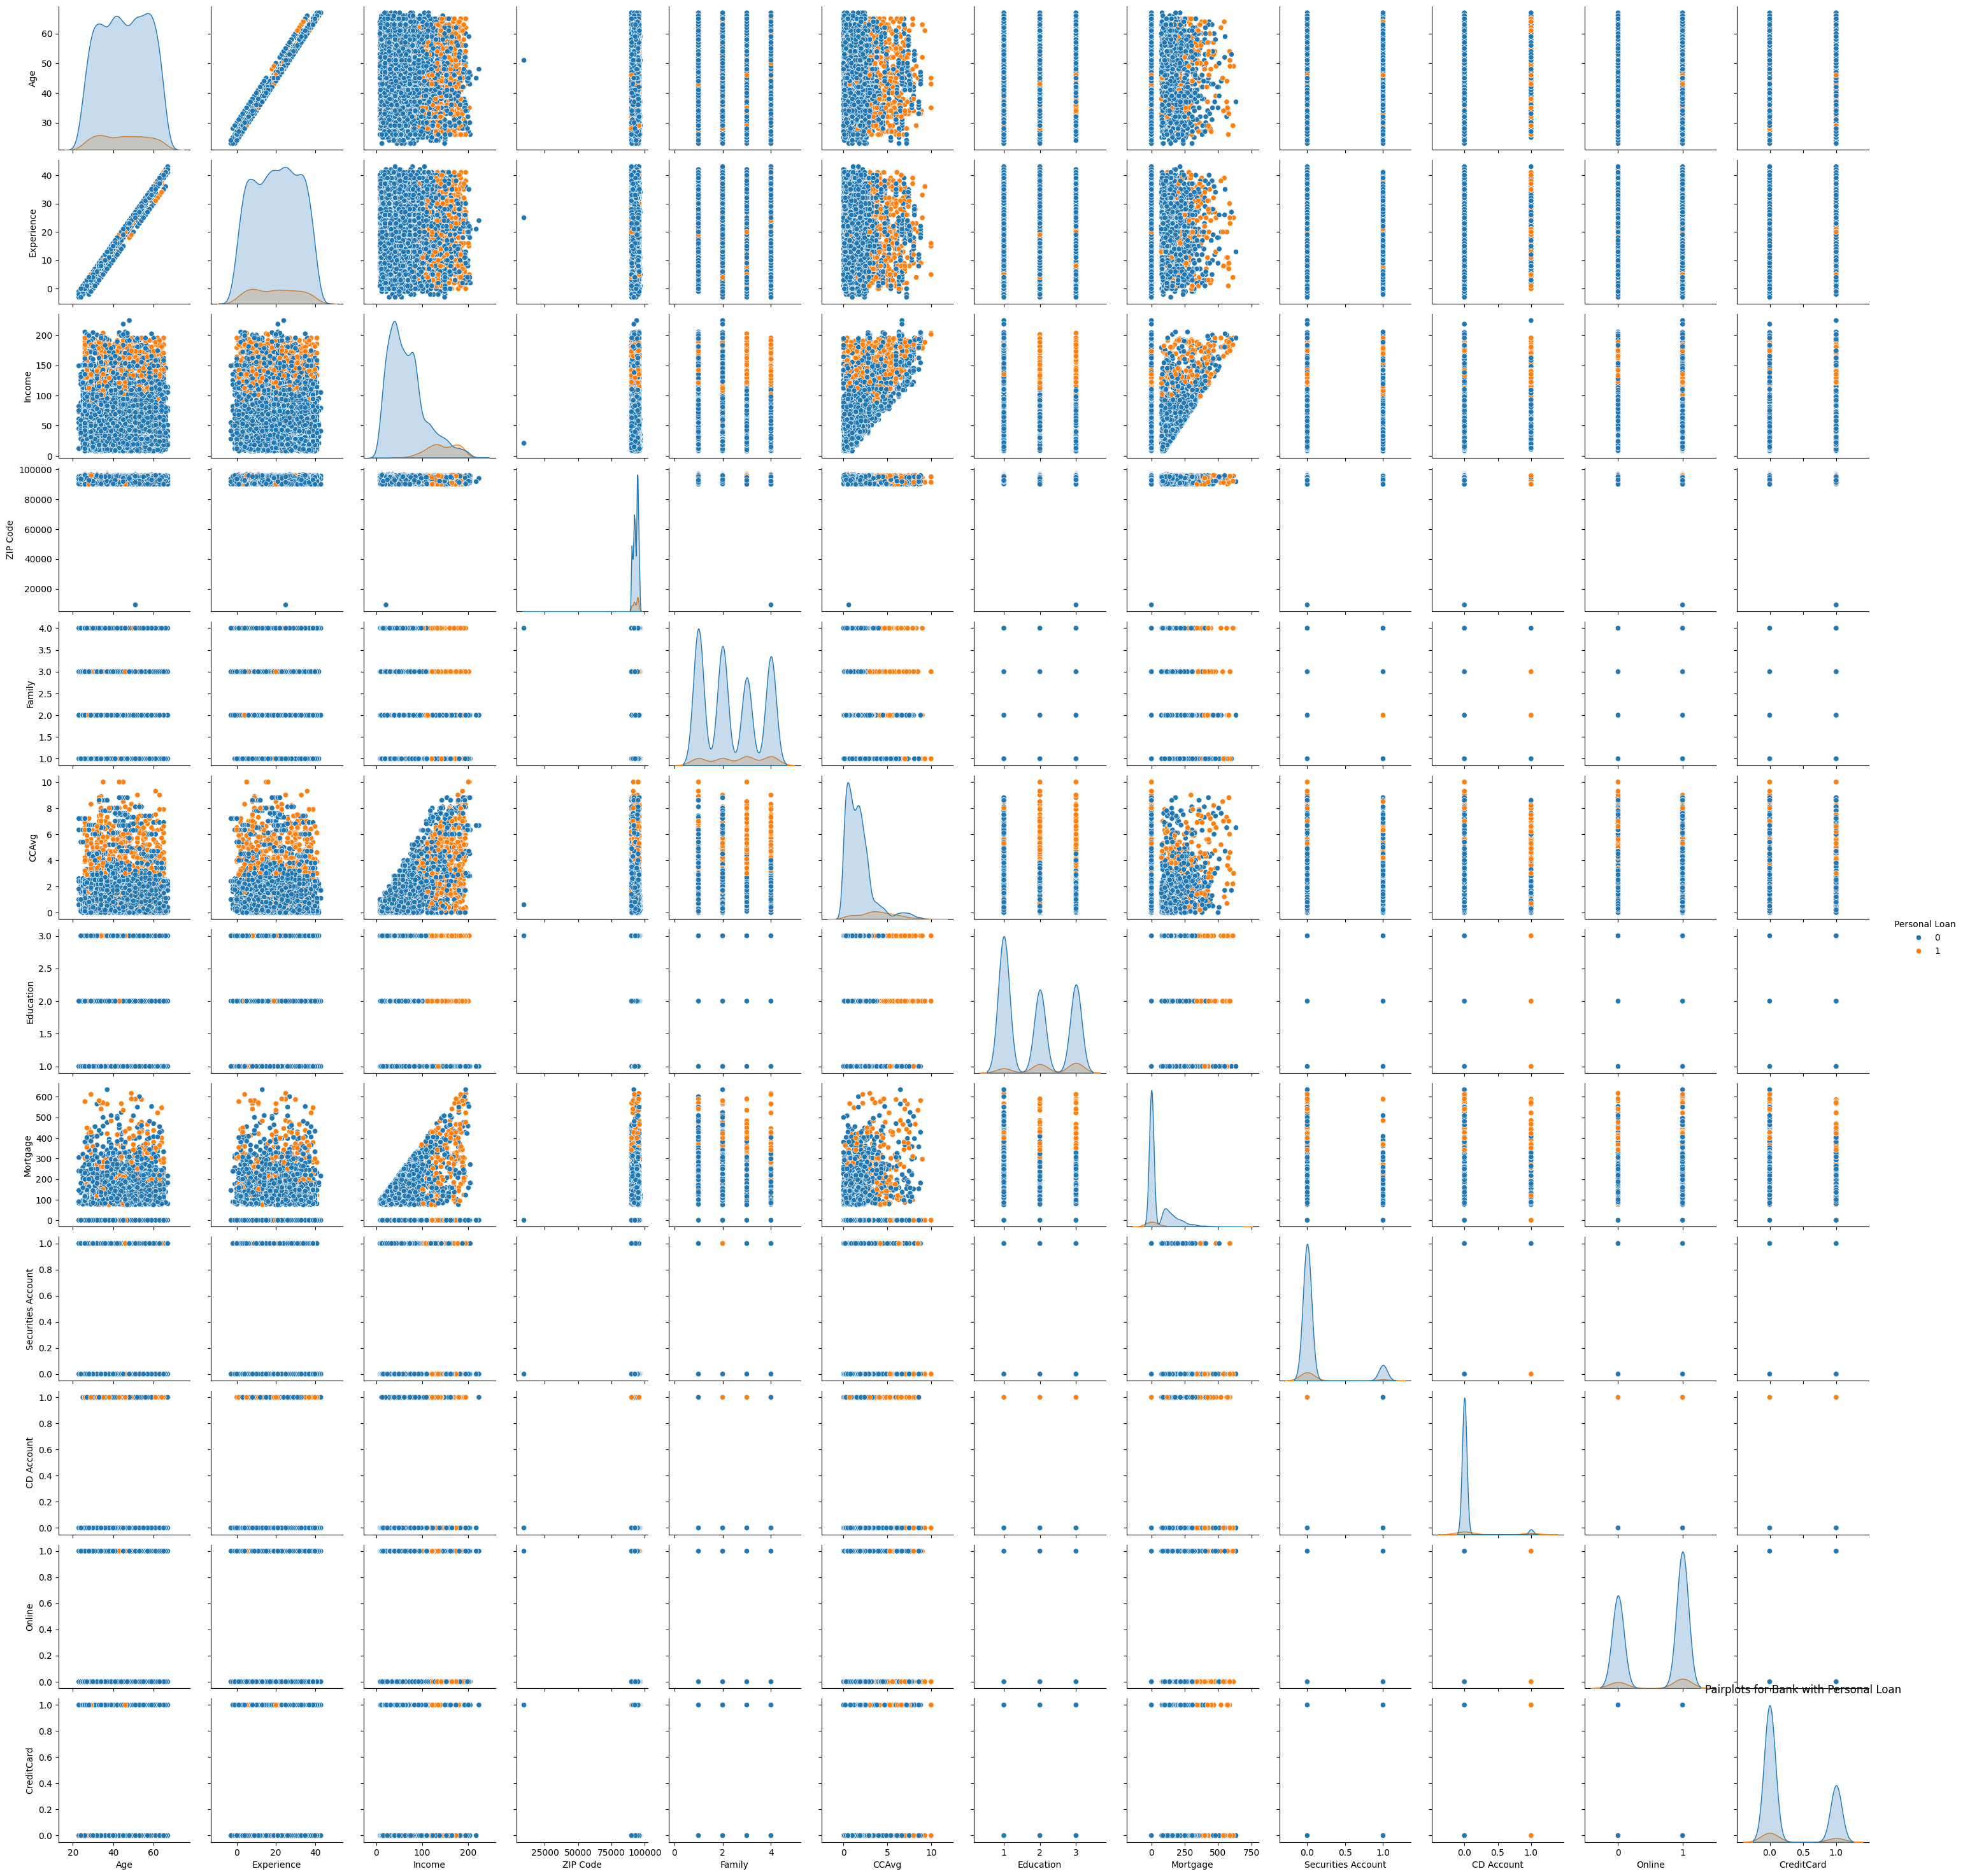

In [85]:
# Plot a pairplot for the attributes. Use "Personal Loan" as hue.

plt.figure(figsize=(30,20))
sns.pairplot(bank_df, hue='Personal Loan',kind = 'scatter')
plt.title('Pairplots for Bank with Personal Loan')
plt.show()

In [87]:
# From the above visualization identify the attributes that are correlated and drop the unnecessary attribute(column)

'''
from the above visualization we can observe that the features
-> ["Age", "Income", Family", "CCAvg", "Education", "Mortgage", "CD Account" ]
are correlated.

so we will include only these features in our model.
'''

new_bank_df = bank_df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage','CD Account', 'Personal Loan']]
new_bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account,Personal Loan
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0


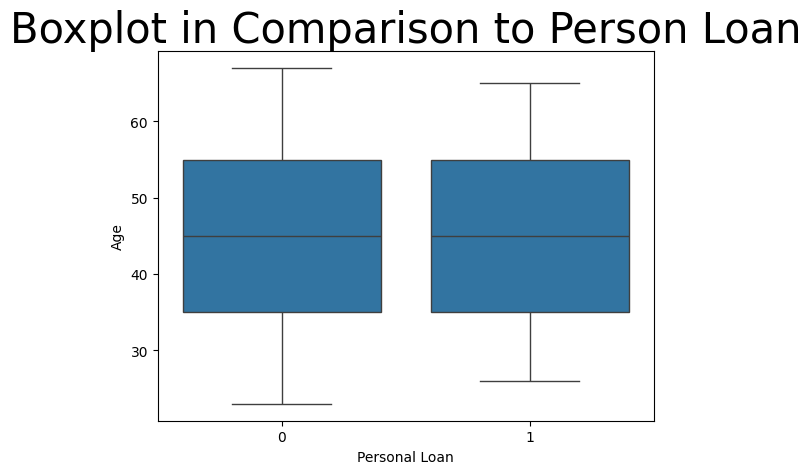

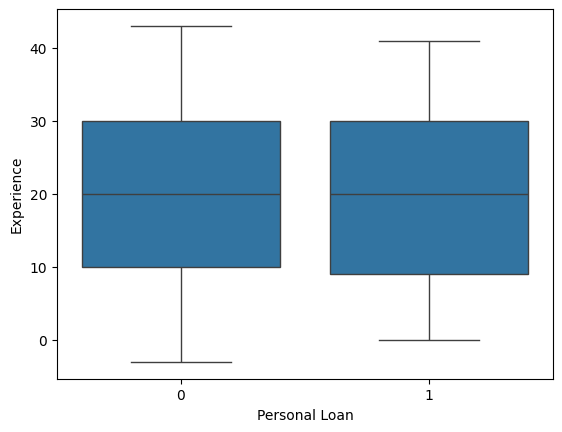

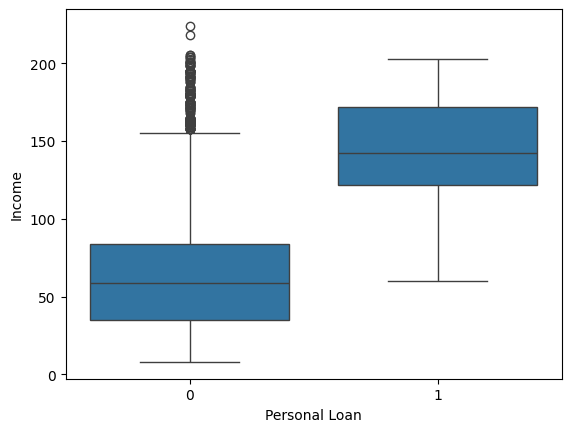

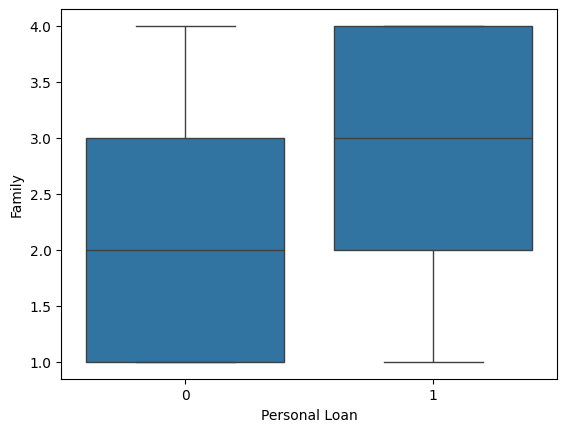

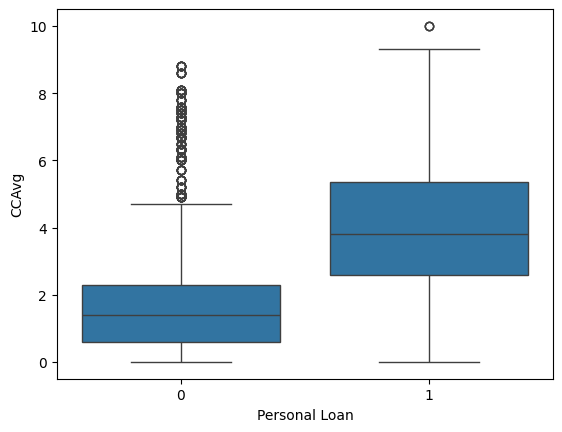

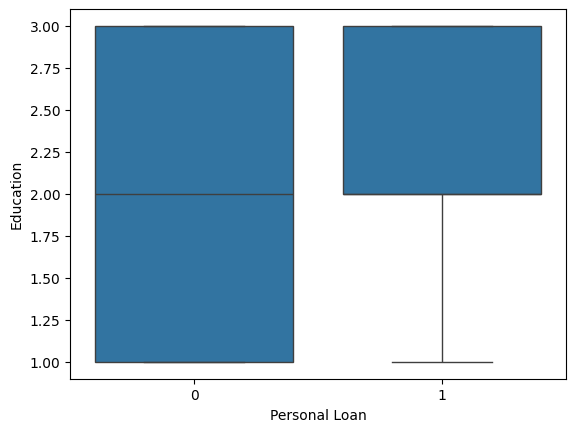

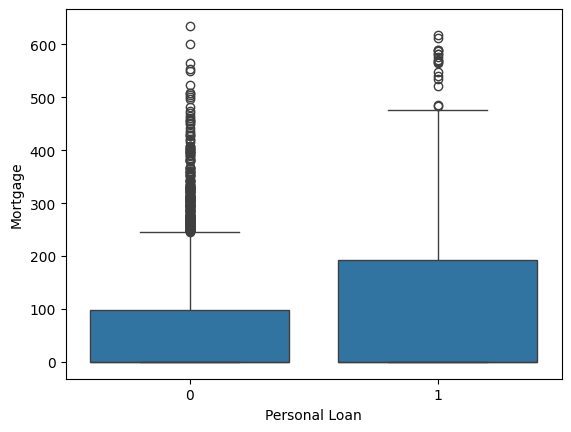

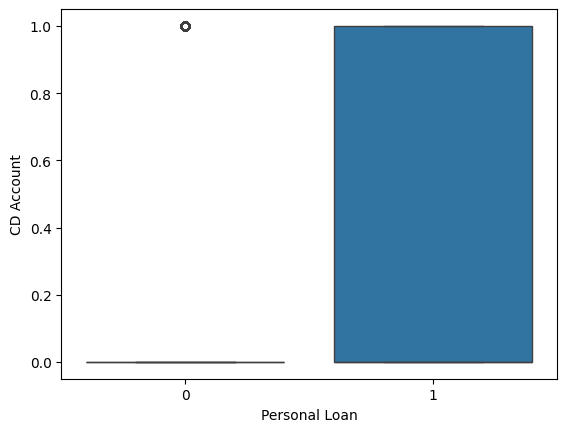

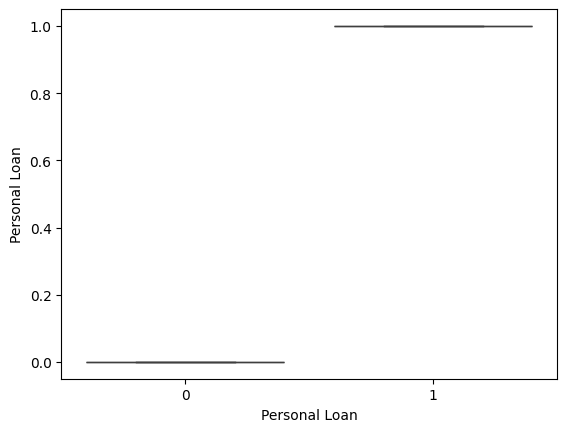

In [104]:
# Plot a boxplot to understand the distribution of data for the attributes such as "Age", "Income", Family", "CCAvg", "Education", "Mortgage" by taking x axis as "Personal Loan"
ls = new_bank_df.columns

plt.title("Boxplot in Comparison to Personal Loan", fontsize = 30)

for i in ls:
  sns.boxplot(data = new_bank_df ,
              x = 'Personal Loan',
              y = i  )
  plt.show()





Unique values for Family: [4 3 1 2]
Unique values for Education: [1 2 3]
Unique values for Personal Loan: [0 1]


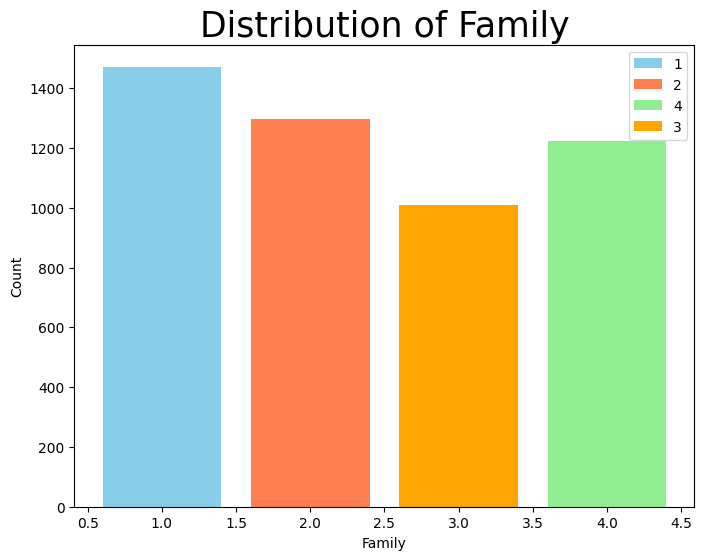

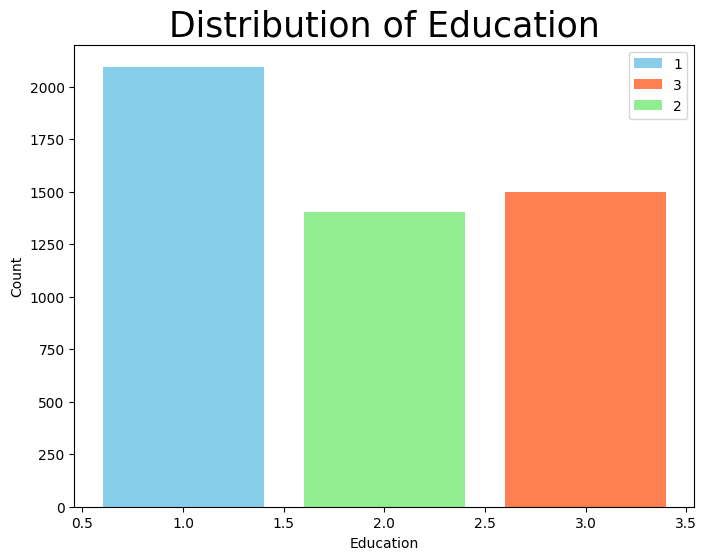

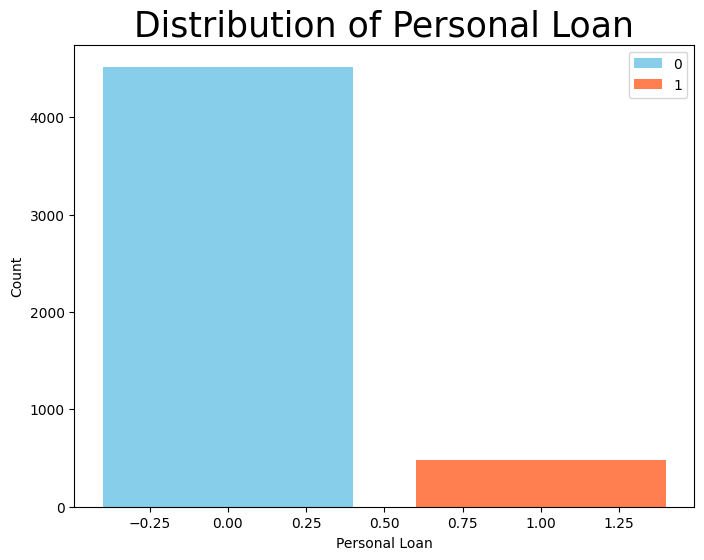

In [113]:
# Display the unique values of attributes "Family", "Education" and "Personal loan" and plot a bargraph.


# Display unique values
for i in ['Family', 'Education', 'Personal Loan']:
    unique_values = new_bank_df[i].unique()
    print(f"Unique values for {i}: {unique_values}")

# Plot bar graphs with colors using plt.bar()
for i in ['Family', 'Education', 'Personal Loan']:
    value_counts = new_bank_df[i].value_counts()
    plt.figure(figsize=(8, 6))
    # Define colors for each bar (adjust as needed)
    colors = ['skyblue', 'coral', 'lightgreen', 'orange', 'purple']
    plt.bar(value_counts.index, value_counts.values, label=value_counts.index, color=colors[:len(value_counts)])
    plt.title(f'Distribution of {i}', fontsize = 25)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

## Task 4: Modelling (25Marks)

1. Split data into X and Y. <b>(1Marks)</b>
2. Split the data into training and test set in the ratio of 70:30 respectively <b>(2Marks)</b>
3. Train a Supervised Learning Classification base model using KNN classifier, Naive Bayes and Logistic Regression. Print the train and test accuracy for the same <b>(12Marks)</b>
4. Print the confusion matrix for all the above models <b>(5Marks)</b>
5. Give your reasoning on which is the best model in this case and why it performs better <b>(5Marks)</b>

In [36]:
# Split data into X and Y.

In [37]:
# Split the data into training and test set in the ratio of 70:30 respectively

In [38]:
# Train a Supervised Learning Classification base model using KNN classifier, Naive Bayes and Logistic Regression. Print the train and test accuracy for the same

In [39]:
# Print the confusion matrix for all the above models

In [40]:
# Give your reasoning on which is the best model in this case and why it performs better